# MT3510 Introduction to Mathematical Computing:

## Pure Mathematics Individual Project

## Sem 2, 2022/23

# Eulerian and Hamiltonian Graphs

This document outlines the individual project on Eulerian and Hamiltonian graphs for MT3510. It is important that you read this document carefully before starting any work.


## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Smith or the week 7 & 8 lab demonstrators. The preferred route of contact for outside the lab is email (fls3@).

## Submitting the project

Submission deadline is 5pm Friday 24th March via MySaint/MMS.

Submit a single Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  60%                   | Written Answers 30% | Originality/Initiative 10% |
| --------------------------- | ------------------- | -------------------------- |
| Correct results 40%         | Accuracy 20%        | Free-choice extension 10%  | 
| Asymptotic complexity 10%   | Conciseness 10%     |                            |
| Readability and style 10%   |                     |                            |

The originality/initiative is available for work that extends the project specifications in some way. It is up to you what this looks like, but you should describe any such extension in the cell available at the end of this notebook. Please be sensible about the amount of extra work you do for this $10\%$; you are welcome to discuss it with me before submission.

## Project Description


In 1736, Leonhard Euler showed that there was no way to travel across the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg), crossing each bridge a single time and ending up where you started. He did this by showing that there is no *Eulerian circuit* in a graph representing the city, where vertices represent landmasses and edges represent bridges between them. This established the first result in graph theory.

More precisely, an *Eulerian circuit* is a cycle $v_1, v_2, \ldots, v_k = v_1$ such that every edge of the graph appears as $\{v_i, v_{i+1}\}$ for some $1 \leq i \leq k$, and no edge is repeated. In other words, it is a cycle which contains every edge of the graph precisely once. You can think about this as some way of travelling around the graph, crossing each edge precisely once. Note that this does **not** mean that each vertex has to be visited precisely once (or even at all!)

We say that a graph is *Eulerian* if there is some Eulerian circuit in the graph.

Euler's realisation was that the existence of an Eulerian circuit is related to the degrees of the vertices.


***Theorem:*** a graph has an Eulerian circuit if and only if every vertex has even degree, and all of the vertices of positive degree are in one connected component.

A few examples are shown below.

**1:** This example is Eulerian: every vertex has even degree, and there is only one connected component. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**2:** This example is not Eulerian: it has a single connected component, but vertices 1 and 4 have odd degree.

**3:** This example is Eulerian: it does have multiple connected components, but only one of them contains vertices of positive degree, and each vertex has even degree. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**4:** This example is not Eulerian; every vertex has even degree but the positive-degree vertices don't lie in a single connected component.

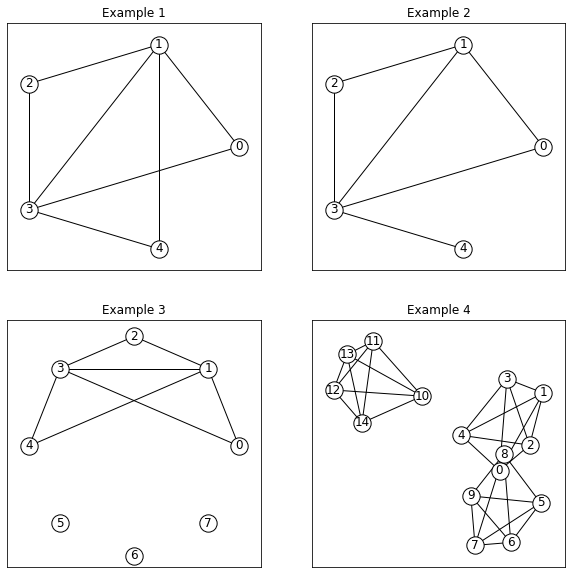

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

G = nx.Graph([{0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 1}, {1, 3}, {0, 3}])
nx.draw_networkx(G, ax=axs[0, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.remove_edge(4, 1)
nx.draw_networkx(G, ax=axs[0, 1], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.add_edge(4, 1)
G.add_nodes_from(range(5, 8))
nx.draw_networkx(G, ax=axs[1, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G = nx.caveman_graph(3, 5)
nx.draw_networkx(G, ax=axs[1, 1], pos = nx.spring_layout(G, k=1.1), node_color="w", edgecolors="k")

axs[0, 0].set_title("Example 1")
axs[0, 1].set_title("Example 2")
axs[1, 0].set_title("Example 3")
axs[1, 1].set_title("Example 4");


## Part 1

One of the proofs of the theorem above is constructive; it defines an algorithm and then shows that the algorithm outputs an Eulerian circuit given the hypotheses of the theorem. The algorithm is as follows:

```
1. Initialise a stack of vertices: pick a vertex u in G, and set stack = [u]
2. Initialise an output circuit: set circuit = []
3. While the stack is not empty:
    4. Call the last element in the stack current_vertex.
    5. If there are any edges from current_vertex that haven't already been considered:
        6: Pick one such edge {current_vertex, neighbour}.
        7. Note that this edge cannot be used again (from either direction).
        8. Append neighbour to the stack.
    9. Otherwise, if there are no such edges, then pop current_vertex from the stack and append it to circuit.
10. Return circuit.
```
The algorithm above finds an Eulerian circuit in a *connected* graph if it has one.

-  Implement this algorithm as a function `eulerian_circuit`.

-  Describe the theoretical worst-case complexity of `eulerian_circuit`, using appropriate parameters for the input size. Is it possible for any algorithm for finding an Eulerian circuit in a connected graph to have a better worse-case complexity than this?

#### Details/clarifications

1. For full credit, your function should not introduce any extra asymptotic complexity not already inherent in the algorithm.
2. You should assume while writing this function that the input will be a connected `networkx` `Graph` which has an Eulerian circuit.
3. You should assume while describing the complexity that $G$ is represented as $(V, E)$ as usual.
4. You are free to assume that the vertices will be the integers `0, 1, ..., len(G) - 1`.
5. If there is no Eulerian circuit, you should instead return `None`.

In [2]:
from collections import deque
import networkx as nx
import random
import time

In [3]:
# YOUR CODE HERE
# raise NotImplementedError()

# Complexity O(m), m = V+E
def eulerian_circuit(G):
    # Check if every vertex has an even degree -- O(V)
    for v in G.nodes:
        if G.degree(v) % 2 != 0:
            return None
        
#     Check if the graph has an Eulerian circuit in its connected components
#     Alternative way of implementation of Part 2
#     Since we assume the input is connected and has an Eulerian circuit, the check below can be omitted

#     positive_degree_nodes = [v for v in G.nodes if G.degree(v) > 0]
#     positive_degree_subgraph = G.subgraph(positive_degree_nodes)
#     if not nx.is_connected(positive_degree_subgraph):
#         return None
    
    stack = [0]  # Initialize the stack with an arbitrary vertex 
    circuit = [] # Initialize output circuit as an empty list

    # To keep track of visited edges, use a dictionary 
    # O(V+E) complexity below 
    visited_edges = {v: set() for v in G.nodes}     # O(V)
    
    while stack: # O(E)
        current_vertex = stack[-1]
        
        neighbors = list(G.neighbors(current_vertex))
        unvisited_neighbors = [n for n in neighbors if n not in visited_edges[current_vertex]]
        
        if unvisited_neighbors:
            neighbor = unvisited_neighbors[0]
            visited_edges[current_vertex].add(neighbor)
            visited_edges[neighbor].add(current_vertex)
            stack.append(neighbor)
        else:
            stack.pop()
            circuit.append(current_vertex)

    return circuit






            
            

YOUR ANSWER HERE
<ol>
  <li>The time complexity of the algorithm is linear O(V+E) as it initialize the edges with O(V) and loop through each edges once in O(E) time, which is similar to the Breadth-First Search (BFS) and Depth-First Search (DFS) algorithms in the lecture </li>
<li> There are no better worse-case complexity than O(m) in finding an Eulerian circuit </li>
</ol>



In [4]:
if not "eulerian_circuit" in globals():
    raise NotImplementedError("eulerian_circuit not defined")


## Part 2

In order to apply the theorem, we need to be able to check whether all of the positive-degree vertices are connected. One way of doing this is to start a traversal from any positive-degree vertex, and check if it visits all of the others.


- Implement a function `all_positive_degree_vertices_connected` which takes a `networkx` `Graph` and returns `True` if all vertices of positive degree are connected, and `False` otherwise. This should use a depth-first or breadth-first traversal.

- Describe the complexity of decioing whether a graph is Eulerian using:
    1. A combination of the functions `eulerian_circuit` and `all_positive_degree_vertices_connected` (i.e. testing whether `eulerian_circuit` returns `None` or `all_positive_degree_vertices_connected` returns `False`).    
    2. Directly applying the characterisation using degrees as described in the introduction.
    - In other words, answer the question "*can we achieve a better theoretical complexity using the theorem above if we only want to **decide** whether there is an Eulerian circuit, rather than find one*?"

**Details/Clarifications**
1. The same details as for part 1 apply, other than `G` being connected.

In [5]:
# YOUR CODE HERE
# raise NotImplementedError()
# Complexity O(V + E)
def all_positive_degree_vertices_connected(G): # Use breadth_first_traversal
    positive_degree_nodes = [v for v in G.nodes if G.degree(v) > 0] # O(V)
    
    if not positive_degree_nodes: 
        return True
    
    starting_vertex = positive_degree_nodes[0] # O(1)
    queue = deque()
    queue.append(starting_vertex)

    seen = set()
    
    while queue: # O(V + E) -- all vertices and edges are visited once
        # Get the first thing in the queue
        current_vertex = queue.popleft()

        if current_vertex not in seen:
            seen.add(current_vertex)
            # Add all of the neighbors of current_vertex to the end of the queue
            queue.extend(G[current_vertex])
                
    return len(seen) == len(positive_degree_nodes) # O(1)



In [6]:
# A combination of the functions eulerian_circuit and all_positive_degree_vertices_connected O(V + E)
def eulerian_circuit(G):
    # Check if every vertex has an even degree O(V)
    for v in G.nodes:
        if G.degree(v) % 2 != 0:
            return None

    if not all_positive_degree_vertices_connected: # O(V + E)
        return None
    
    stack = [0]  
    circuit = [] 
    # O(V+E) complexity below 
    visited_edges = {v: set() for v in G.nodes}     # O(V)
    
    while stack: # O(E)
        current_vertex = stack[-1]
        
        neighbors = list(G.neighbors(current_vertex))
        unvisited_neighbors = [n for n in neighbors if n not in visited_edges[current_vertex]]
        
        if unvisited_neighbors:
            neighbor = unvisited_neighbors[0]
            visited_edges[current_vertex].add(neighbor)
            visited_edges[neighbor].add(current_vertex)
            stack.append(neighbor)
        else:
            stack.pop()
            circuit.append(current_vertex)

    return circuit

YOUR ANSWER HERE
<ol>
  <li>Check every vertex has even degre is O(V) </li>
  <li>Check all positivve degree vertices are connected is O(V+E)</li>
  <li>Return the Eulerian circuit is O(V+E)</li>
</ol>
<ol>
<li>The combined functions eulerian_circuit and all_positive_degree_vertices_connected has O(V+E) complexity</li>
<li> Directly applying the characterisation using degrees has O(V+E) complexity</li>
</ol>
Hence, we can not achieve a better therotical complexity if we only want to decide whether there is an Eulerian circuit




In [7]:
if not "all_positive_degree_vertices_connected" in globals():
    raise NotImplementedError("all_positive_degree_vertices_connected not defined")

## Part 3

In the same way that an *Eulerian* cycle is one which contains every edge precisely once, a *Hamiltonian* cycle is one which contains every *vertex* precisely once (apart from whichever vertex is picked to be "first", which must be visited twice to obtain a cycle). Determinining whether a graph is *Hamiltonian* (contains a Hamiltonian cycle) is significantly harder than determining whether it is Eulerian. In particular, it is NP-complete.


- Implement a function `hamiltonian_cycle` which uses a backtrack search to find a Hamiltonian cycle in a graph, if one exists.
- Use your function to find a Hamiltonian cycle in the Hoffman-Singleton graph.

Details:
1. Your function should return `None` if the graph is not Hamiltonian.
2. You should return a `list` of vertices representing the cycle; the first vertex in the list should also appear at the end to close the cycle.

In [8]:
# YOUR CODE HERE
# raise NotImplementedError()
def hamiltonian_cycle(G):
    
    # recursive backtrack function
    def dive(path):
        # check length of the path 
        if len(path) == len(G):
            # connect last and first element of path 
            if path[0] in G[path[-1]]:
                # return the hamiltonian cycle 
                return path + [path[0]]
            else:
                return None
            
        # way extending partial solution
        for neighbor in G[path[-1]]:
            # add to path if not been visited 
            if neighbor not in path:
                path.append(neighbor)
                # recurse
                res = dive(path)
                # pass it up
                if res is not None:
                    return res
                # back to previous vertex and explore other neighbor 
                path.pop()
        # No solutions found
        return None

    # Iterate through all vertexs as start
    for start_vertex in G:
        cycle = dive([start_vertex])
        if cycle is not None:
            return cycle

    return None


In [9]:
# Hamiltonian cycle in the Hoffman-Singleton graph
H = nx.hoffman_singleton_graph()
cycle = hamiltonian_cycle(H)
print(cycle)

[0, 1, 17, 4, 3, 5, 12, 11, 2, 10, 18, 6, 22, 13, 30, 19, 7, 34, 15, 35, 25, 9, 32, 23, 14, 31, 20, 37, 29, 16, 33, 27, 44, 43, 42, 26, 38, 24, 41, 40, 21, 36, 39, 28, 48, 47, 45, 46, 49, 8, 0]


In [10]:
if not "hamiltonian_cycle" in globals():
    raise NotImplementedError("hamiltonian_cycle has not been defined")

## Originality/Initiative

As described in the introduction, the maximum grade available without going beyond the project specifications is $90\%$, and to achieve the final $10\%$ you must extend the project in some way. What form this takes is entirely up to you, as long as you still meet the specifications of each part. You are welcome to discuss this with me before submission.

If you have extended the project in some way, then please briefly outline what you have done in the cell below.

YOUR ANSWER HERE
###### Initiative 1
<p>The first Initiative is done in Part 1, which I test the connected-subgraph through nx.is_connected. Below, I will  investigate further about the hamiltonian cycle</p>
<p>Finding a hamiltonian cycle is an NP-complete problem as we could not find a solution in less than exponential time, as shown by the brute-force permutation function hamiltonian_permutations(G) below</p>
<p>The function has O(n!) complexity -- generate all n! permutations for the graph, for each it then checks the edges, which takes O(n). The overall complexity is O(n * n!) = O(n!)</p>
<p>As it enumerates all simple paths between the first and last nodes, it may have performance issues for large graphs such as Hoffman-Singleton graph</p>

In [11]:
def hamiltonian_permutations(G):
    start = 0
    end = len(G) - 1
    h_path = []
    for path in nx.all_simple_paths(G, source=start, target=end):
        if(len(path) == len(G)) and G.has_edge(path[-1], start):
            path.append(start)
            h_path.append(path)
    return h_path    

[[0, 1, 2, 3, 4, 0],
 [0, 1, 3, 2, 4, 0],
 [0, 2, 1, 3, 4, 0],
 [0, 2, 3, 1, 4, 0],
 [0, 3, 1, 2, 4, 0],
 [0, 3, 2, 1, 4, 0]]

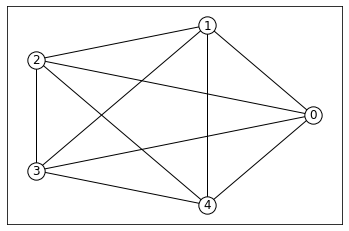

In [12]:
# Find all hamiltonian cycle in complete graph 
C = nx.complete_graph(5)
nx.draw_networkx(C, pos=nx.circular_layout(C), node_color="w", edgecolors="k")

hamiltonian_permutations(C)

###### Initiative 2
Dirac’s theorem: Let $G = (V, E)$ be a graph with n vertices in which each vertex has degree at
least $n/2$ then $G$ has a Hamiltonian cycle
<p>Hamiltonian_dirac(G) is an implementation of the Dirac’s theorem. However, Dirac's theorem cannot be directly applied to guarantee the existence of a Hamiltonian cycle in Hoffman-Singleton graph, as shown below</p>


In [13]:
# Sufficient condition which fails with the H Graph 
def hamiltonian_dirac(G):
    min_degree = len(G) // 2
    for vertex in G:
        if G.degree(vertex) < min_degree:
            return False
    return True

In [14]:
C = nx.complete_graph(5)
hamiltonian_dirac(C)

True

In [15]:
H = nx.hoffman_singleton_graph()
hamiltonian_dirac(H)

False